### Create random forest model after normalizing the variable to house pricing from boston data set.

In [ ]:
'''
Build the random forest model after normalizing the variable to house pricing from boston data set.

Following the code to get data into the environment:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target
'''

In [2]:
# matplotlib inline :to refrelect plots and graphics on jupyter notbooks itself
%matplotlib inline
# for Data analysis using pandas
import pandas as pd
# for numerical opeartions using numpy
import numpy as np
# for graphical representation of data using Seaborn
import seaborn as sns
# for graphical representation of data using matplotlib
import matplotlib.pyplot as plt
# python modules for machine learning algorithm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

### Loading DataSet

In [3]:
# Loading Data form Boston data sets 

bost_data = datasets.load_boston()
print("The attributes of boston data are:",bost_data.keys())

The attributes of boston data are: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# Description of boston data
print(bost_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Features (columns) of boston data
print("The features of boston data are: ",bost_data.feature_names)

The features of boston data are:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Trasforming boston dataste into dataframe 
Bost_data_df = pd.DataFrame(bost_data.data , columns=bost_data.feature_names)
# adding up boston data target variable into dataframe
Bost_data_df['PRICE']=bost_data.target
print("The first 5 rows of boston data :")
Bost_data_df.head()

The first 5 rows of boston data :


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Statistical and Descriptive analysis of boston dataset

In [8]:
print("No. Of rows in dataset : {0}\nNo. Of columns in boston data : {1}" .format(Bost_data_df.shape[0],Bost_data_df.shape[1]))

No. Of rows in dataset : 506
No. Of columns in boston data : 14


In [9]:
print("The Stuructue of boston data \n")
Bost_data_df.info()

The Stuructue of boston data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [10]:
# Check for presence of Null-values in dataset
Bost_data_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Correlation between Target variable PRICE and Fatures ( independent variables) of BOSTON Housing Data


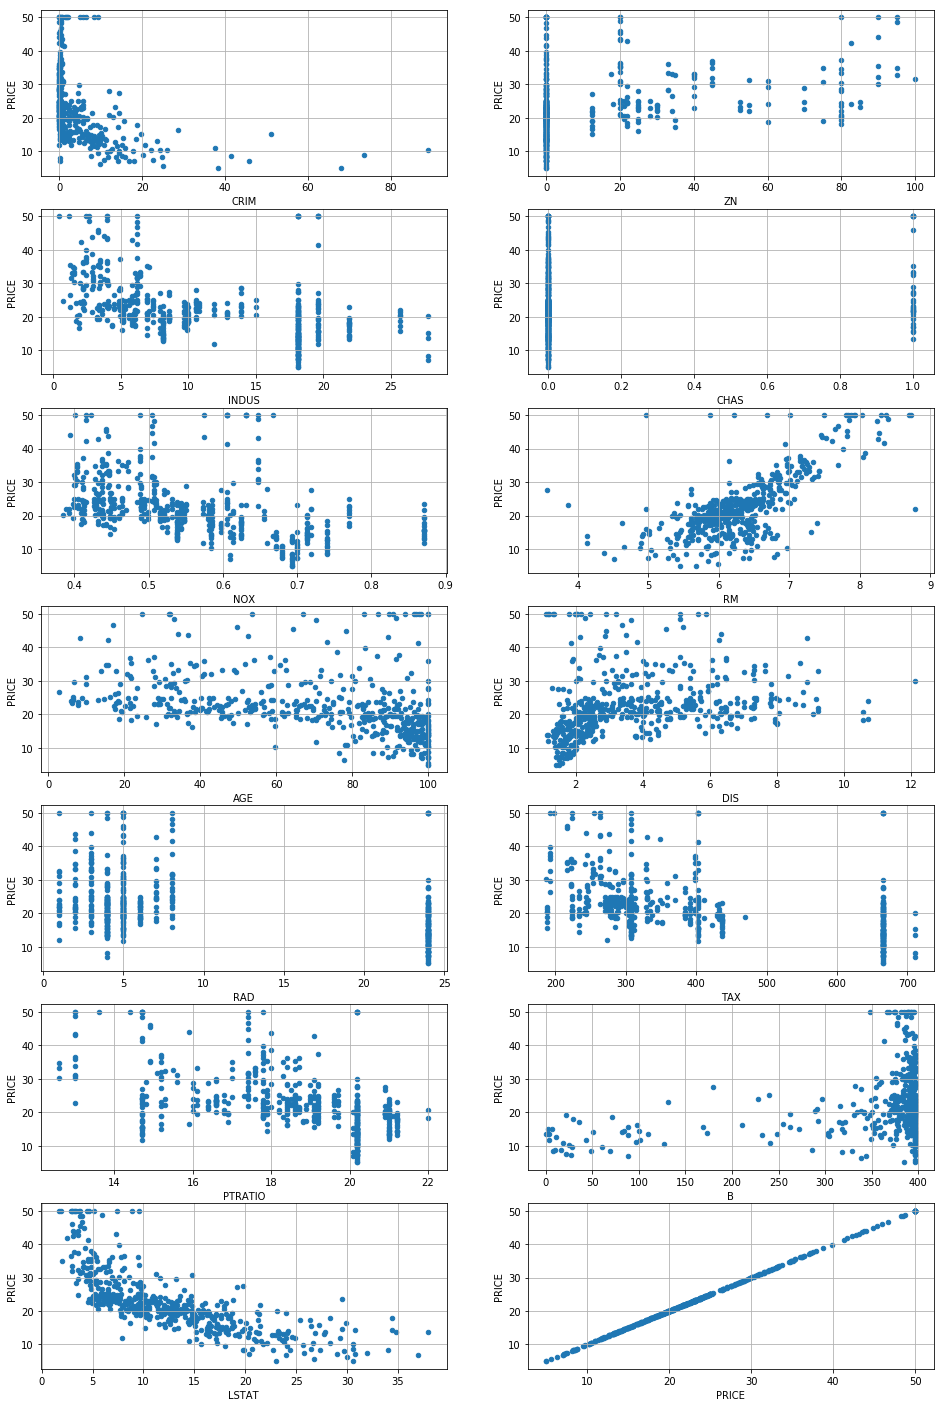

In [12]:
# Visual analysis between target variable ( PRICE) and Other features of boston dataset
print("Correlation between Target variable "'PRICE'" and Fatures ( independent variables) of BOSTON Housing Data")
fig, axs = plt.subplots(7, 2 , sharey=False)
Bost_data_df.plot(kind='scatter', x=Bost_data_df.columns[0], y='PRICE', ax=axs[0][0] , figsize=(16,25) , grid=True )
Bost_data_df.plot(kind='scatter', x=Bost_data_df.columns[1], y='PRICE', ax=axs[0][1], grid=True)
Bost_data_df.plot(kind='scatter', x=Bost_data_df.columns[2], y='PRICE', ax=axs[1][0], grid=True)Bost_data_df
Bost_data_df.plot(kind='scatter', x=Bost_data_df.columns[3], y='PRICE', ax=axs[1][1], grid=True)
Bost_data_df.plot(kind='scatter', x=Bost_data_df.columns[4], y='PRICE', ax=axs[2][0], grid=True)
Bost_data_df.plot(kind='scatter', x=Bost_data_df.columns[5], y='PRICE', ax=axs[2][1], grid=True)
Bost_data_df.plot(kind='scatter', x=Bost_data_df.columns[6], y='PRICE', ax=axs[3][0], grid=True)
Bost_data_df.plot(kind='scatter', x=Bost_data_df.columns[7], y='PRICE', ax=axs[3][1], grid=True)
Bost_data_df.plot(kind='scatter', x=Bost_data_df.columns[8], y='PRICE', ax=axs[4][0], grid=True)
Bost_data_df.plot(kind='scatter', x=Bost_data_df.columns[9], y='PRICE', ax=axs[4][1], grid=True)
Bost_data_df.plot(kind='scatter', x=Bost_data_df.columns[10], y='PRICE', ax=axs[5][0], grid=True)
Bost_data_df.plot(kind='scatter', x=Bost_data_df.columns[11], y='PRICE', ax=axs[5][1], grid=True)
Bost_data_df.plot(kind='scatter', x=Bost_data_df.columns[12], y='PRICE', ax=axs[6][0], grid=True)
Bost_data_df.plot(kind='scatter', x=Bost_data_df.columns[13], y='PRICE', ax=axs[6][1], grid=True)
plt.show()

### Data Preparation

In [13]:
# Selection of Target variable and other independent features from Boston dataset
features_df=Bost_data_df.iloc[:,:-1]
target_df=Bost_data_df.iloc[:,-1:]

In [14]:
# DataFrame with independent( columns) Features
features_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [15]:
# DataFrame with dependent( columns) Features
target_df.head(2)

,PRICE
0,24.0
1,21.6


#### Split the Target and Feature variable into Train and Test dataset

In [16]:
# split data randomly into 80% training and 20% test
X_train , X_test , y_train , y_test = train_test_split(features_df  , target_df , test_size=0.2 , random_state=10 , shuffle=True)

print("The Size of Fetures data(X) for Training set" , X_train.shape)
print("The Size of Fetures data(X) for Test set" , X_test.shape)
print("The Size of Target data(y) for Training set" , y_train.shape)
print("The Size of Target data(y) for Test set" , y_test.shape)

The Size of Fetures data(X) for Training set (404, 13)
The Size of Fetures data(X) for Test set (102, 13)
The Size of Target data(y) for Training set (404, 1)
The Size of Target data(y) for Test set (102, 1)


In [17]:
#Selection of dependent and independent variable 
indepnt_var=Bost_data_df.columns[:-1].tolist()
depnt_var=Bost_data_df.columns[-1:].tolist()
print("Independent features :  ", indepnt_var)
print("dependent features :  ",depnt_var)

Independent features :   ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
dependent features :   ['PRICE']


### Applying Random Forest model

In [18]:
# As we have to predict Dependency of price feature based upon other independet features & along with that data in dataset is of Countinous data
# Hence We go with Regression algorithm in Random forest model

from sklearn.ensemble import RandomForestRegressor

In [19]:
# Parameters of Random forest regressor 
# n_estimators : The number of trees  in the forest. default is 10
# max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# n_jobs : The number of jobs to run in parallel for both `fit` and `predict`.
# random_state : random_state is the seed used by the random number generator

# random forest regressor with considering all the parameters of boston dataset with 50 estimators(no. of tree)
random_forest_reg = RandomForestRegressor(n_estimators=50 , n_jobs=2 , random_state=10 )

In [21]:
# Fit the data into random forest model using training dataset
random_forest_reg.fit(X_train[indepnt_var] ,  np.ravel(y_train[depnt_var]))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [22]:
# prediction of Price based upon input features in Tarining data
y_pred_train = random_forest_reg.predict(X_train[indepnt_var]) 
print("The predicted price are (first 10 rows) (Training data)")
y_pred_train[0:10]

The predicted price are (first 10 rows) (Training data)


array([20.244, 21.258, 13.67 , 21.2  , 21.63 , 14.324, 25.87 , 18.056,
       12.086, 21.718])

In [24]:
# Mean Price from boston dataset
print("The mean Price from Boston dataset :",Bost_data_df['PRICE'].mean())

The mean Price from Boston dataset : 22.532806324110698


Plot between Actual Price and Predicted Price based upon Training data


C:\Users\Avengers\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


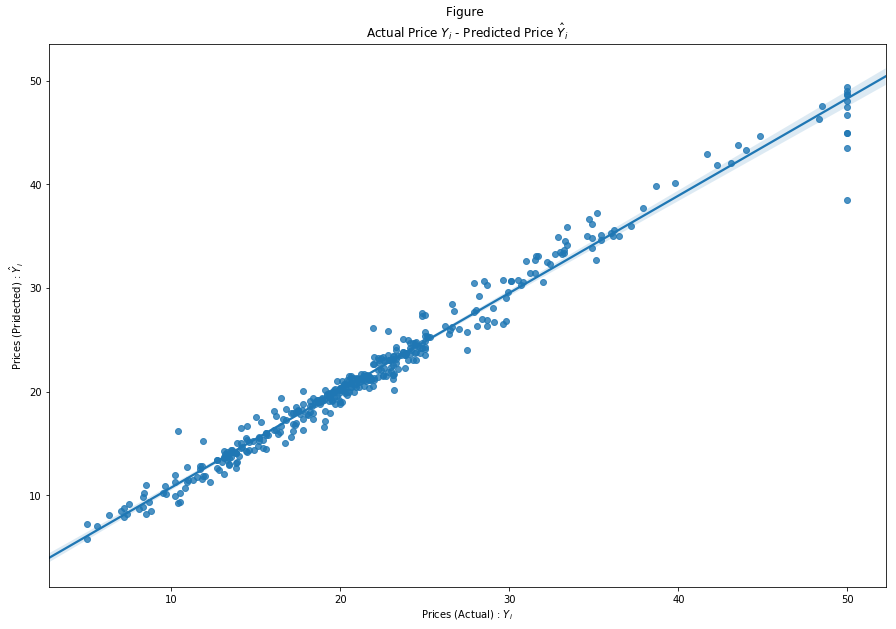

In [25]:
# Scatter plot between Existing Price Data and Predictd price data
print("Plot between Actual Price and Predicted Price based upon Training data")
fig = plt.figure(figsize=(15,10))
plt.title('Figure \n' + r'Actual Price $Y_i$ - Predicted Price $\hat{Y}_i$')
sns.regplot(x=np.ravel(y_train[depnt_var]) , y= y_pred_train)
plt.xlabel("Prices (Actual) : $Y_i$ ")
plt.ylabel("Prices (Pridected) : $\hat{Y}_i$ ")
plt.show()

In [26]:
#  prediction of Price based upon inoout features in Test data
y_pred_test = random_forest_reg.predict(X_test[indepnt_var]) 
print("The predicted price are (first 10 rows) (Test data)")
y_pred_test[0:10]

The predicted price are (first 10 rows) (Test data)


array([25.092, 28.626, 25.616, 29.632, 18.634, 15.566, 45.624, 15.34 ,
       21.26 , 45.658])

Plot between Actual Price and Predicted Price based upon Test data


C:\Users\Avengers\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


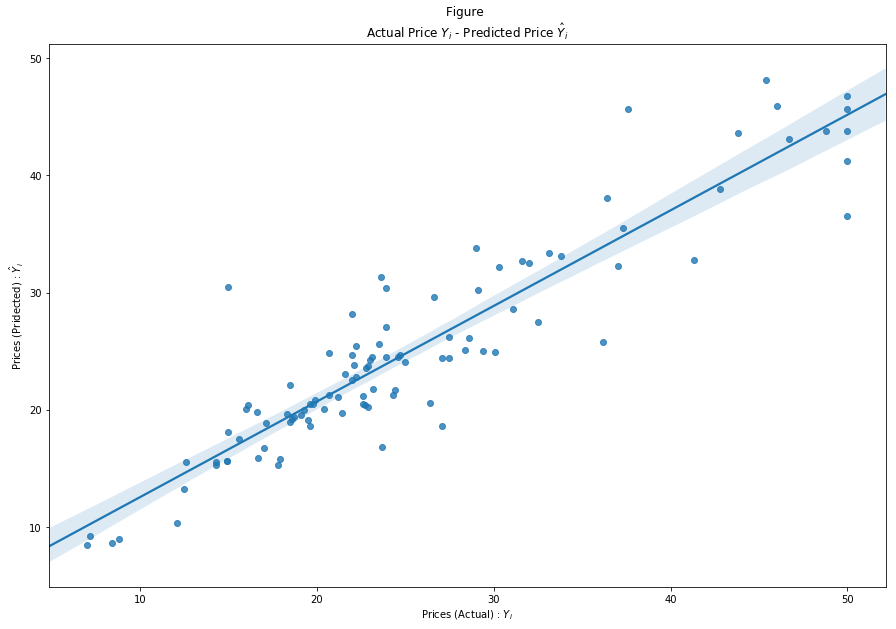

In [27]:
# Scatter plot between Existing Price Data and Predictd price data
print("Plot between Actual Price and Predicted Price based upon Test data")
fig = plt.figure(figsize=(15,10))
plt.title('Figure \n' + r'Actual Price $Y_i$ - Predicted Price $\hat{Y}_i$')
sns.regplot(x=np.ravel(y_test[depnt_var]) , y= y_pred_test)
plt.xlabel("Prices (Actual) : $Y_i$ ")
plt.ylabel("Prices (Pridected) : $\hat{Y}_i$ ")
plt.show()

### Evaluating Model performance

#### Model evaluation for Training Data 

In [28]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error 

no_of_tree= len(random_forest_reg.estimators_)
accuracy_score_train= random_forest_reg.score(X=X_train, y=np.ravel(y_train[depnt_var]))
mean_abs_error_train= mean_absolute_error(np.ravel(y_train[depnt_var]) , y_pred_train)
mean_squared_error_train= mean_squared_error(np.ravel(y_train[depnt_var]) , y_pred_train)
root_mean_squared_error_train = np.sqrt(mean_squared_error(np.ravel(y_train[depnt_var]) , y_pred_train))

print("Based upon Training data\n")
print("No . Of tree in random forest regression model :" , no_of_tree)
print('Accuracy Score :' ,accuracy_score_train )
print('Mean Absolute Error:', mean_abs_error_train)  
print('Mean Squared Error:', mean_squared_error_train )  
print('Root Mean Squared Error:', root_mean_squared_error_train)

Based upon Training data

No . Of tree in random forest regression model : 50
Accuracy Score : 0.9773873100196115
Mean Absolute Error: 0.8571980198019811
Mean Squared Error: 1.7402918217821794
Root Mean Squared Error: 1.3192012059508509


#### Model evaluation for Test Data

In [29]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error 
no_of_tree= len(random_forest_reg.estimators_)
accuracy_score_test= random_forest_reg.score(X=X_test, y=np.ravel(y_test[depnt_var]))
mean_abs_error_test= mean_absolute_error(np.ravel(y_test[depnt_var]) , y_pred_test)
mean_squared_error_test= mean_squared_error(np.ravel(y_test[depnt_var]) , y_pred_test)
root_mean_squared_error_test = np.sqrt(mean_squared_error(np.ravel(y_test[depnt_var]) , y_pred_test))

print("Based upon Test data\n")
print("No . Of tree in random forest regression model :" , no_of_tree)
print('Accuracy Score :' , accuracy_score_test )
print('Mean Absolute Error:',mean_abs_error_test)  
print('Mean Squared Error:', mean_squared_error_test )  
print('Root Mean Squared Error:', root_mean_squared_error_test)

Based upon Test data

No . Of tree in random forest regression model : 50
Accuracy Score : 0.8536195187232887
Mean Absolute Error: 2.744137254901961
Mean Squared Error: 15.308579490196077
Root Mean Squared Error: 3.9126179841886017


No. Of Tree in Random Forest Model : 50
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=965494256, splitter='best')


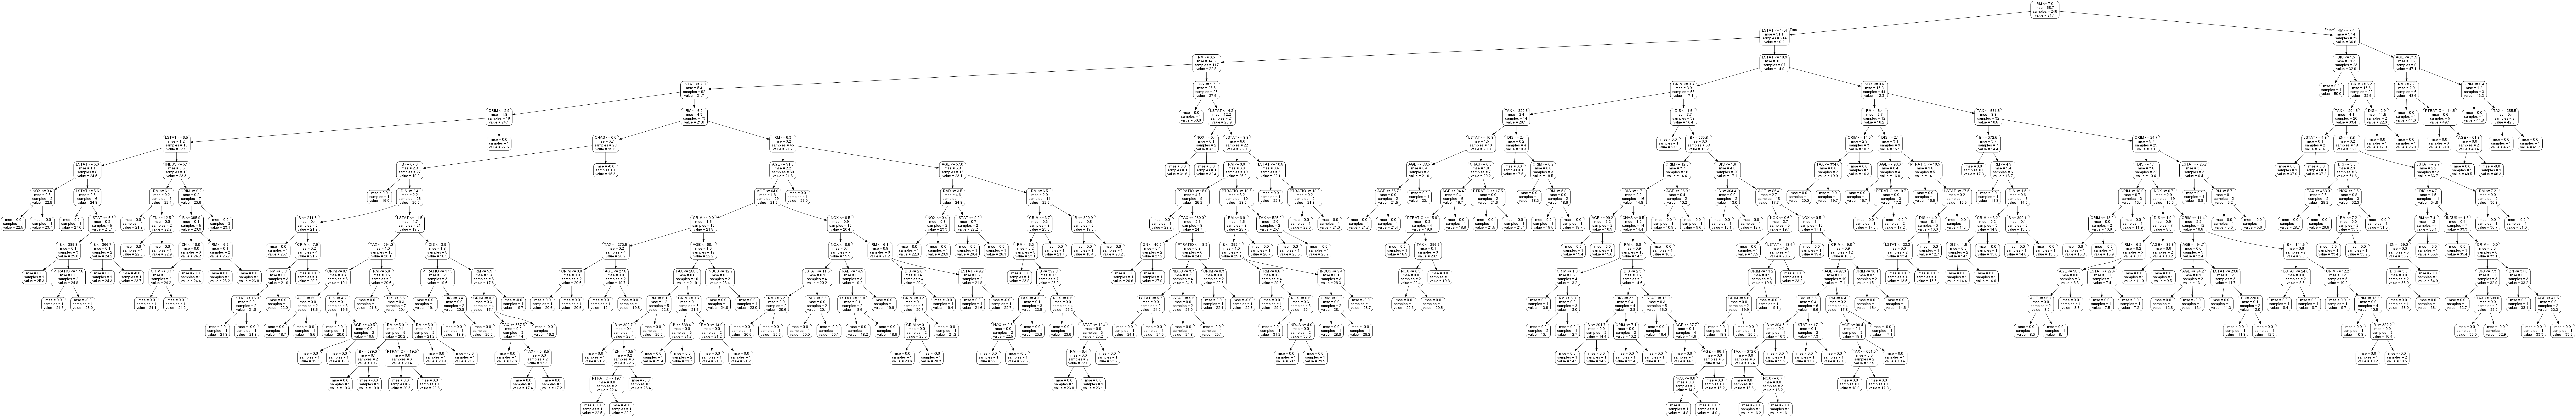

In [31]:
# Visulisation of single tree from random forest model
from IPython.display import Image, display  # to disaply decision tree
from sklearn.tree import export_graphviz
import pydotplus

# Pull out one tree from the forest
print("No. Of Tree in Random Forest Model :" ,len(random_forest_reg.estimators_ ))

# Random tree selection from Random forest model
tree= random_forest_reg.estimators_[10]
print(tree)
# Export the image to a dot file
dot_data_train=export_graphviz(tree, out_file = None, feature_names = indepnt_var , class_names=depnt_var, rounded = True, precision = 1)
graph_train = pydotplus.graph_from_dot_data(dot_data_train)
display(Image(graph_train.create_png()))

#### Variable Importances

In [32]:
# Selection of important features returned by Random forest model
importance=random_forest_reg.feature_importances_
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(indepnt_var, importance)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Feature: LSTAT                Importance: 0.485
Feature: RM                   Importance: 0.335
Feature: DIS                  Importance: 0.052
Feature: CRIM                 Importance: 0.031
Feature: NOX                  Importance: 0.023
Feature: B                    Importance: 0.019
Feature: AGE                  Importance: 0.016
Feature: TAX                  Importance: 0.014
Feature: PTRATIO              Importance: 0.014
Feature: INDUS                Importance: 0.005
Feature: RAD                  Importance: 0.004
Feature: ZN                   Importance: 0.001
Feature: CHAS                 Importance: 0.001


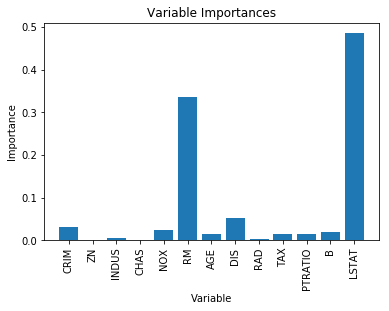

In [34]:
# Visual representation of important features'# Set the style
# list of x locations for plotting
x_values = list(range(len(importance)))
# Make a bar chart
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, indepnt_var, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance');
plt.xlabel('Variable'); 
plt.title('Variable Importances');

Imapct of No. of estimator on Accuracy of model (Training data)


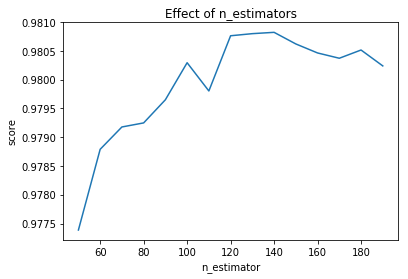

In [35]:
# Visualisation for impact of No. Of estimators on Accuracy(Score) of random forest model for training data
print("Imapct of No. of estimator on Accuracy of model (Training data)")
#range of estimator usiung numpy
estimators = np.arange(50, 200, 10)
scores = []
for n in estimators:
    random_forest_reg.set_params(n_estimators=n)
    random_forest_reg.fit(X_train, np.ravel(y_train))
    scores.append(random_forest_reg.score(X_train, np.ravel(y_train)))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
plt.show()

As we can see that , when no. of estimator increases more than 140 eastimators , there is decline in model accuracy.

### Model Imporvement using chnage in no. Of estimators

#### Random Forest model with 100 No of estimators

In [36]:
# Create Random forest model with 100 estimators 
random_forest_reg_model_2 = RandomForestRegressor(n_estimators=100 , n_jobs=2 , random_state=10)

In [38]:
# Fit the training data into model
random_forest_reg_model_2.fit(X_train[indepnt_var] ,  np.ravel(y_train[depnt_var]))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [39]:
# prediction of Price based upon input features in Tarining data
y_pred_train_2 = random_forest_reg_model_2.predict(X_train[indepnt_var]) 
print("The predicted price are (first 10 rows) (Training data)")
y_pred_train_2[0:10]

The predicted price are (first 10 rows) (Training data)


array([20.131, 21.046, 13.783, 21.071, 21.504, 14.39 , 25.813, 18.263,
       11.963, 21.782])

In [40]:
# prediction of Price based upon input features in Test data
y_pred_test_2 = random_forest_reg_model_2.predict(X_test[indepnt_var]) 
print("The predicted price are (first 10 rows) (Test data)")
y_pred_test_2[0:10]

The predicted price are (first 10 rows) (Test data)


array([24.777, 29.298, 25.193, 28.946, 19.124, 15.176, 45.632, 15.565,
       20.798, 46.118])

In [41]:
# Evaluation of model on training data 
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error 
no_of_tree_2= len(random_forest_reg_model_2.estimators_)
accuracy_score_train_2= random_forest_reg_model_2.score(X=X_train, y=np.ravel(y_train[depnt_var]))
mean_abs_error_train_2= mean_absolute_error(np.ravel(y_train[depnt_var]) , y_pred_train_2)
mean_squared_error_train_2= mean_squared_error(np.ravel(y_train[depnt_var]) , y_pred_train_2)
root_mean_squared_error_train_2 = np.sqrt(mean_squared_error(np.ravel(y_train[depnt_var]) , y_pred_train_2))
print("Based upon Training data\n")
print("No . Of tree in random forest regression model :" , no_of_tree_2)
print('Accuracy Score :' , accuracy_score_train_2)
print('Mean Absolute Error:', mean_abs_error_train_2 )  
print('Mean Squared Error:', mean_squared_error_train_2 )  
print('Root Mean Squared Error:',root_mean_squared_error_train_2 )

Based upon Training data

No . Of tree in random forest regression model : 100
Accuracy Score : 0.9802935014848592
Mean Absolute Error: 0.8175519801980182
Mean Squared Error: 1.5166288589108912
Root Mean Squared Error: 1.2315148634551234


In [42]:
# Evaluation of model on Test data 
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error 
no_of_tree_2= len(random_forest_reg_model_2.estimators_)
accuracy_score_test_2= random_forest_reg_model_2.score(X=X_test, y=np.ravel(y_test[depnt_var]))
mean_abs_error_test_2= mean_absolute_error(np.ravel(y_test[depnt_var]) , y_pred_test_2)
mean_squared_error_test_2= mean_squared_error(np.ravel(y_test[depnt_var]) , y_pred_test_2)
root_mean_squared_error_test_2 =np.sqrt(mean_squared_error(np.ravel(y_test[depnt_var]) , y_pred_test_2))
print("Based upon Training data\n")
print("No . Of tree in random forest regression model :" ,no_of_tree_2 )
print('Accuracy Score :' , accuracy_score_test_2)
print('Mean Absolute Error:', mean_abs_error_test_2 )  
print('Mean Squared Error:', mean_squared_error_test_2)  
print('Root Mean Squared Error:',root_mean_squared_error_test_2 )

Based upon Training data

No . Of tree in random forest regression model : 100
Accuracy Score : 0.860353790323963
Mean Absolute Error: 2.6890098039215697
Mean Squared Error: 14.604304362745095
Root Mean Squared Error: 3.8215578450083805


#### Random Forest model with 140 No of estimators

In [43]:
# Create Random forest model with 140 estimators 
random_forest_reg_model_3 = RandomForestRegressor(n_estimators=140 , n_jobs=2 , random_state=10)

In [44]:
# Fit the training data into model
random_forest_reg_model_3.fit(X_train[indepnt_var] ,  np.ravel(y_train[depnt_var]))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=2,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [45]:
# prediction of Price based upon input features in Tarining data
y_pred_train_3 = random_forest_reg_model_3.predict(X_train[indepnt_var]) 
print("The predicted price are (first 10 rows) (Training data)")
y_pred_train_3[0:10]

The predicted price are (first 10 rows) (Training data)


array([20.09642857, 20.96428571, 13.76857143, 21.10357143, 21.65214286,
       14.295     , 25.47071429, 18.29857143, 12.025     , 21.84      ])

In [46]:
# prediction of Price based upon input features in Test data
y_pred_test_3 = random_forest_reg_model_3.predict(X_test[indepnt_var]) 
print("The predicted price are (first 10 rows) (Test data)")
y_pred_test_3[0:10]

The predicted price are (first 10 rows) (Test data)


array([24.905     , 29.29285714, 25.26      , 28.76928571, 19.22714286,
       14.92285714, 45.48      , 15.47071429, 20.925     , 46.36857143])

In [47]:
# Evaluation of model on training data 
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error 
no_of_tree_3= len(random_forest_reg_model_3.estimators_)
accuracy_score_train_3=random_forest_reg_model_3.score(X=X_train, y=np.ravel(y_train[depnt_var]))
mean_abs_error_train_3=mean_absolute_error(np.ravel(y_train[depnt_var]) , y_pred_train_3)
mean_squared_error_train_3= mean_squared_error(np.ravel(y_train[depnt_var]) , y_pred_train_3)
root_mean_squared_error_train_3 =np.sqrt(mean_squared_error(np.ravel(y_train[depnt_var]) , y_pred_train_3))
print("Based upon Training data\n")
print("No . Of tree in random forest regression model :" , len(random_forest_reg_model_3.estimators_))
print('Accuracy Score :' , accuracy_score_train_3 )
print('Mean Absolute Error:',mean_abs_error_train_3)  
print('Mean Squared Error:', mean_squared_error_train_3)  
print('Root Mean Squared Error:',root_mean_squared_error_train_3 )

Based upon Training data

No . Of tree in random forest regression model : 140
Accuracy Score : 0.9808213831443796
Mean Absolute Error: 0.8008362800565758
Mean Squared Error: 1.4760026381592264
Root Mean Squared Error: 1.2149084896234887


In [48]:
# Evaluation of model on Test data 
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error 
no_of_tree_3= len(random_forest_reg_model_3.estimators_)
accuracy_score_test_3=random_forest_reg_model_3.score(X=X_test, y=np.ravel(y_test[depnt_var]))
mean_abs_error_test_3=mean_absolute_error(np.ravel(y_test[depnt_var]) , y_pred_test_3)
mean_squared_error_test_3= mean_squared_error(np.ravel(y_test[depnt_var]) , y_pred_test_3)
root_mean_squared_error_test_3 =np.sqrt(mean_squared_error(np.ravel(y_test[depnt_var]) , y_pred_test_3))
print("Based upon Training data\n")
print("No . Of tree in random forest regression model :" , no_of_tree_3 )
print('Accuracy Score :' , accuracy_score_test_3)
print('Mean Absolute Error:',mean_abs_error_test_3)  
print('Mean Squared Error:',mean_squared_error_test_3 )  
print('Root Mean Squared Error:',root_mean_squared_error_test_3 )

Based upon Training data

No . Of tree in random forest regression model : 140
Accuracy Score : 0.8605431173493746
Mean Absolute Error: 2.6758683473389353
Mean Squared Error: 14.584504401760698
Root Mean Squared Error: 3.818966404900768


#### Comparison of Random Forest model based on No. Of Estimators

In [49]:
# Transform data into  Data frame 
# asigning no. of  tree
lst_no_tree = [no_of_tree , no_of_tree_2 , no_of_tree_3 ]
# asigning accuracy scores into list
lst_accuracy_score_train = [accuracy_score_train , accuracy_score_train_2 , accuracy_score_train_3 ]
# asigning Mean absolute error into list
lst_mean_abs_error_train = [mean_abs_error_train , mean_abs_error_train_2 , mean_abs_error_train_3 ]
# asigning Mean squared error into list
lst_mean_sqrd_error_train = [mean_squared_error_train , mean_squared_error_train_2 , mean_squared_error_train_3 ]
# asigning root squared error into list
lst_root_mean_sqrd_error_train = [root_mean_squared_error_train , root_mean_squared_error_train_2 , root_mean_squared_error_train_3 ]
# Transforming list into dataframe 
df_random_forest_train =pd.DataFrame(list(zip(lst_no_tree, lst_accuracy_score_train, lst_mean_abs_error_train ,lst_mean_sqrd_error_train ,  lst_root_mean_sqrd_error_train)), columns=['No. Of Trees' , 'Accuracy Score','Mean Abs. Error','Mean Squared Error','RMSE(Root Mean sqaure value)'])
print("evalution of random forest model (based on training data )")
df_random_forest_train

evalution of random forest model (based on training data )


,No. Of Trees,Accuracy Score,Mean Abs. Error,Mean Squared Error,RMSE(Root Mean sqaure value)
0,50,0.977387,0.857198,1.740292,1.319201
1,100,0.980294,0.817552,1.516629,1.231515
2,140,0.980821,0.800836,1.476003,1.214908


In [50]:
# asigning no. of  tree
lst_no_tree = [no_of_tree , no_of_tree_2 , no_of_tree_3 ]
# asigning accuracy scores into list
lst_accuracy_score_test = [accuracy_score_test , accuracy_score_test_2 , accuracy_score_test_3 ]
# asigning Mean absolute error into list
lst_mean_abs_error_test = [mean_abs_error_test , mean_abs_error_test_2 , mean_abs_error_test_3 ]
# asigning Mean squared error into list
lst_mean_sqrd_error_test = [mean_squared_error_test , mean_squared_error_test_2 , mean_squared_error_test_3 ]
# asigning root squared error into list
lst_root_mean_sqrd_error_test = [root_mean_squared_error_test , root_mean_squared_error_test_2 , root_mean_squared_error_test_3 ]
# Transforming list into dataframe 
df_random_forest_test =pd.DataFrame(list(zip(lst_no_tree, lst_accuracy_score_test, lst_mean_abs_error_test ,lst_mean_sqrd_error_test ,  lst_root_mean_sqrd_error_test)), columns=['No. Of Trees' , 'Accuracy Score','Mean Abs. Error','Mean Squared Error','RMSE(Root Mean sqaure value)'])
print("evalution of random forest model (based on test data )")
df_random_forest_test

evalution of random forest model (based on test data )


,No. Of Trees,Accuracy Score,Mean Abs. Error,Mean Squared Error,RMSE(Root Mean sqaure value)
0,50,0.853620,2.744137,15.308579,3.912618
1,100,0.860354,2.689010,14.604304,3.821558
2,140,0.860543,2.675868,14.584504,3.818966


Based upon above data , we can predict that as denser the random forest model is ( i.e more no. of trees in random forest model have) it predict higher accuracy.Also higher no. of estimator may decrease accuracy of model.